<a href="https://colab.research.google.com/github/VanshGupta-2404/Bank_of_Baroda_hackathon/blob/main/financial_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 0.49


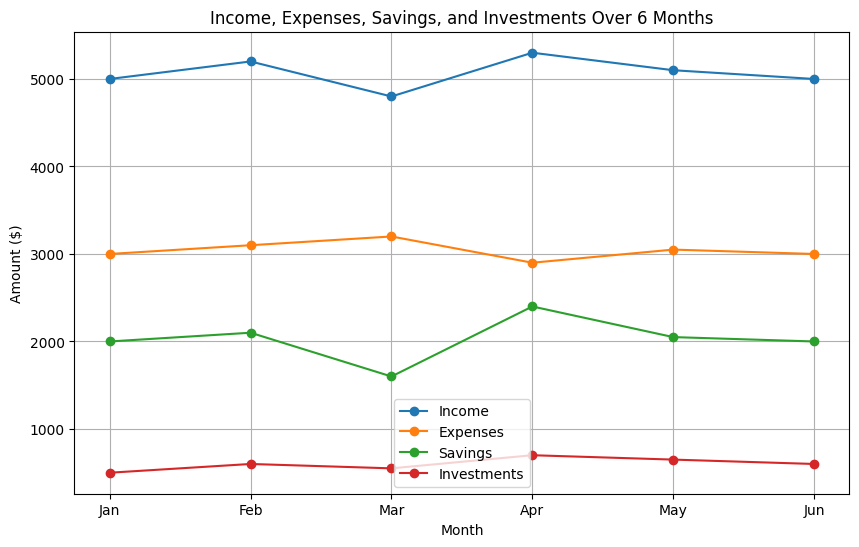

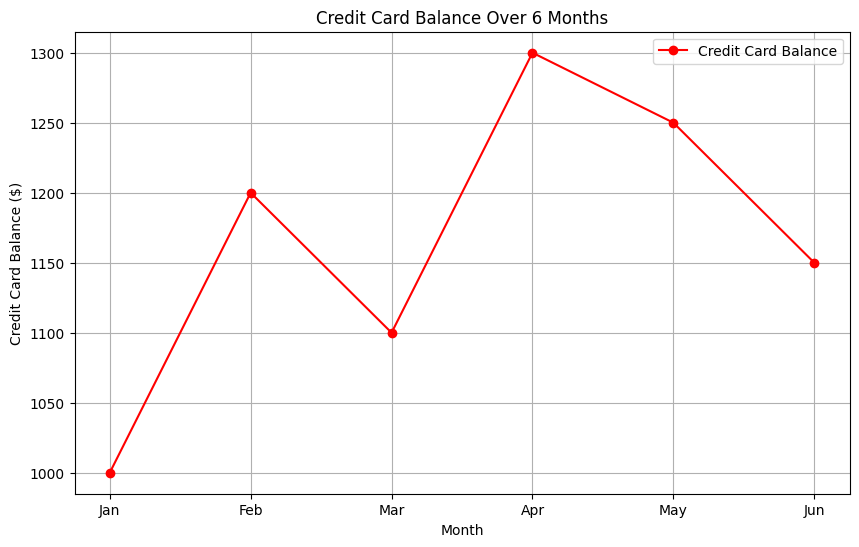

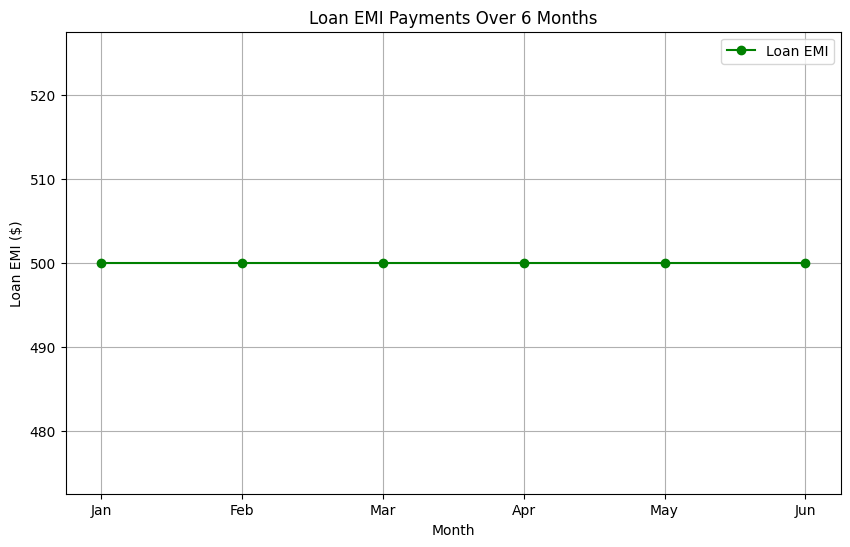

6-Month Financial Summary:
            Income     Expenses      Savings  Investments  \
count     6.000000     6.000000     6.000000     6.000000   
mean   5066.666667  3041.666667  2025.000000   600.000000   
std     175.119007   102.062073   256.417628    70.710678   
min    4800.000000  2900.000000  1600.000000   500.000000   
25%    5000.000000  3000.000000  2000.000000   562.500000   
50%    5050.000000  3025.000000  2025.000000   600.000000   
75%    5175.000000  3087.500000  2087.500000   637.500000   
max    5300.000000  3200.000000  2400.000000   700.000000   

       Credit Card Balance  Loan EMI  
count             6.000000       6.0  
mean           1166.666667     500.0  
std             108.012345       0.0  
min            1000.000000     500.0  
25%            1112.500000     500.0  
50%            1175.000000     500.0  
75%            1237.500000     500.0  
max            1300.000000     500.0  
Average Monthly Income: $5066.67
Average Monthly Expenses: $3041.67
Aver

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

np.random.seed(42)

num_samples = 10000


data = {
    'Month': np.random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], num_samples),
    'Income': np.random.randint(4000, 6000, num_samples),
    'Expenses': np.random.randint(2000, 4000, num_samples),
    'Savings': np.random.randint(1000, 3000, num_samples),
    'Investments': np.random.randint(300, 800, num_samples),
    'Credit Card Balance': np.random.randint(800, 1500, num_samples),
    'Loan EMI': np.random.randint(400, 600, num_samples),
    'Product Preference': np.random.choice(['Credit Card', 'Loan'], num_samples)
}


df = pd.DataFrame(data)


label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop('Product Preference', axis=1)
y = df['Product Preference']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


def generate_financial_report(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Month'], df['Income'], label='Income', marker='o')
    plt.plot(df['Month'], df['Expenses'], label='Expenses', marker='o')
    plt.plot(df['Month'], df['Savings'], label='Savings', marker='o')
    plt.plot(df['Month'], df['Investments'], label='Investments', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Amount ($)')
    plt.title('Income, Expenses, Savings, and Investments Over 6 Months')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['Month'], df['Credit Card Balance'], label='Credit Card Balance', marker='o', color='r')
    plt.xlabel('Month')
    plt.ylabel('Credit Card Balance ($)')
    plt.title('Credit Card Balance Over 6 Months')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['Month'], df['Loan EMI'], label='Loan EMI', marker='o', color='g')
    plt.xlabel('Month')
    plt.ylabel('Loan EMI ($)')
    plt.title('Loan EMI Payments Over 6 Months')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Summary Report
    print("6-Month Financial Summary:")
    print(df.describe())


    avg_income = df['Income'].mean()
    avg_expenses = df['Expenses'].mean()
    avg_savings = df['Savings'].mean()
    avg_investments = df['Investments'].mean()

    print(f"Average Monthly Income: ${avg_income:.2f}")
    print(f"Average Monthly Expenses: ${avg_expenses:.2f}")
    print(f"Average Monthly Savings: ${avg_savings:.2f}")
    print(f"Average Monthly Investments: ${avg_investments:.2f}")

    report_text = f"""
    Financial Report for the Last 6 Months:

    1. Monthly Income:
       - Average Monthly Income: ${avg_income:.2f}

    2. **Monthly Expenses**:
       - Average Monthly Expenses: ${avg_expenses:.2f}

    3. Monthly Savings:
       - Average Monthly Savings: ${avg_savings:.2f}

    4. Monthly Investments:
       - Average Monthly Investments: ${avg_investments:.2f}

    5. Credit Card Balance:
       - The credit card balance fluctuated between ${df['Credit Card Balance'].min()} and ${df['Credit Card Balance'].max()} over the last 6 months.

    6. Loan EMI:
       - The monthly loan EMI remained constant at ${df['Loan EMI'][0]}.

    Key Insights:
    - The highest income was recorded in April at ${df.loc[df['Month'] == 'Apr', 'Income'].mean()}, while the lowest was in January at ${df.loc[df['Month'] == 'Jan', 'Income'].mean()}.
    - Expenses peaked in March at ${df.loc[df['Month'] == 'Mar', 'Expenses'].mean()}, while the lowest expenses were in April at ${df.loc[df['Month'] == 'Apr', 'Expenses'].mean()}.
    - Savings were highest in April at ${df.loc[df['Month'] == 'Apr', 'Savings'].mean()} and lowest in March at ${df.loc[df['Month'] == 'Mar', 'Savings'].mean()}.
    - Investments were highest in April at ${df.loc[df['Month'] == 'Apr', 'Investments'].mean()} and lowest in January at ${df.loc[df['Month'] == 'Jan', 'Investments'].mean()}.
    """
    print(report_text)

# Example Data
example_data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Income': [5000, 5200, 4800, 5300, 5100, 5000],
    'Expenses': [3000, 3100, 3200, 2900, 3050, 3000],
    'Savings': [2000, 2100, 1600, 2400, 2050, 2000],
    'Investments': [500, 600, 550, 700, 650, 600],
    'Credit Card Balance': [1000, 1200, 1100, 1300, 1250, 1150],
    'Loan EMI': [500, 500, 500, 500, 500, 500]
}

example_df = pd.DataFrame(example_data)
generate_financial_report(example_df)
